In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



In [100]:
np.random.seed(0)

In [101]:
n_pts = 500
X, y = datasets.make_circles(n_pts, random_state=123, noise=0.1, factor=0.2)

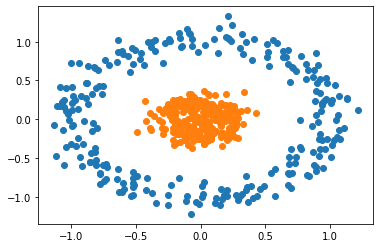

In [102]:
plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])


In [103]:
model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.01), 'binary_crossentropy', metrics=['accuracy'])


In [104]:
h = model.fit(x=X,y=y,batch_size=32, verbose=1, epochs=100, shuffle='true')

Epoch 1/100
16/16 [==============================] - 0s 1000us/step - loss: 0.7535 - accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 933us/step - loss: 0.7052 - accuracy: 0.4860
Epoch 3/100
16/16 [==============================] - 0s 1000us/step - loss: 0.6921 - accuracy: 0.3480
Epoch 4/100
16/16 [==============================] - 0s 1000us/step - loss: 0.6920 - accuracy: 0.5600
Epoch 5/100
16/16 [==============================] - 0s 933us/step - loss: 0.6920 - accuracy: 0.5360
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6180
Epoch 7/100
16/16 [==============================] - 0s 933us/step - loss: 0.6908 - accuracy: 0.5580
Epoch 8/100
16/16 [==============================] - 0s 933us/step - loss: 0.6903 - accuracy: 0.4800
Epoch 9/100
16/16 [==============================] - 0s 1000us/step - loss: 0.6894 - accuracy: 0.5780
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6894 - accura

Text(0.5, 1.0, 'accuracy')

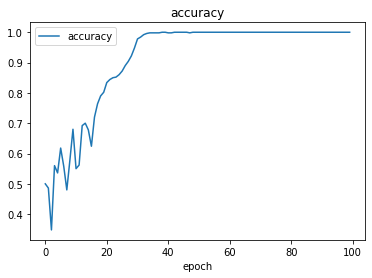

In [105]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

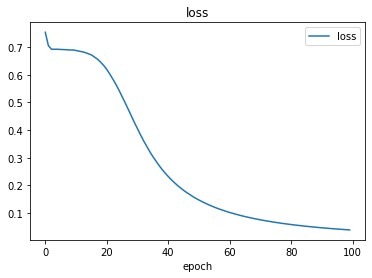

In [106]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [107]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    # print(y_span)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_,yy_ = xx.ravel(), yy.ravel()
    # print(xx_)
    # print(yy_)
    grid = np.c_[xx_,yy_]
    # print(grid)
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:n_pts,0], X[:n_pts,1])
    plt.scatter(X[n_pts:,0], X[n_pts:,1])

[[0.9798069]]


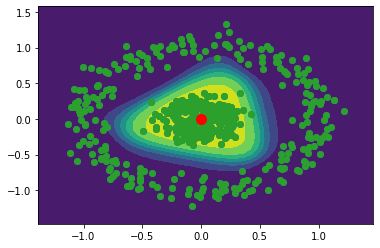

In [110]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.3
y = -0.1
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker='o', markersize=10, color='red')
print(prediction)